In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#Import the dataset
df = pd.read_csv('loan/loan.csv')

In [3]:
#Checking shape
df.shape

(39717, 111)

In [4]:
# Drop columns which does not hold any information
drop_cols = []
for i in df.columns:
    if df[i].nunique() == 0:
        drop_cols.append(i)
#print(drop_cols)
df = df.drop(columns=drop_cols)

In [5]:
# Check info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
# Check number of unique vaulues per column 
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [7]:
# Find out single value columns
singular_val_cols = []
for i in df.columns:
    if df[i].nunique() == 1:
        singular_val_cols.append(i)


In [8]:
# pymnt_plan = n always
# initial_list_status = f always
# collections_12_mths_ex_med = 0 or NA
# policy_code = 1 always
# application_type = INDIVIDUAL always
# acc_now_delinq = 0 always
# chargeoff_within_12_mths = 0 or NA
# delinq_amnt = 0 always
# tax_liens = 0 or NA

# drop columns that are not required for analysis
drop_cols = ['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med',
             'chargeoff_within_12_mths','tax_liens','id','member_id','emp_title','issue_d','url','desc','title','zip_code','earliest_cr_line',
             'mths_since_last_record','out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
             'collection_recovery_fee','last_pymnt_amnt','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
df = df.drop(columns=drop_cols)


In [9]:
# Change column type to numeric by removing strings
pd.set_option('display.max_columns',None)
df['int_rate'] = df['int_rate'].apply(lambda x:float(x[:-1]))
df['term']=df['term'].apply(lambda x:int(x[1:-7]))
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [10]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,NaN,3,0,13648,83.7,9,5863.155187,5833.84,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,NaN,3,0,1687,9.4,4,1008.710000,1008.71,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,NaN,2,0,2956,98.5,10,3005.666844,3005.67,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,35.0,10,0,5598,21.0,37,12231.890000,12231.89,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,0,38.0,15,0,27783,53.9,38,3513.330000,3513.33,0.0


In [11]:
# Discard rows with loan_status = 'Fully Paid' as they are not required for analysis
df2 = df[~((df['loan_status'] == 'Current'))]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  int64  
 4   int_rate                38577 non-null  float64
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  addr_state              38577 non-null  obj

In [13]:
df2.nunique()

loan_amnt                   870
funded_amnt                1019
funded_amnt_inv            8050
term                          2
int_rate                    370
installment               15022
grade                         7
sub_grade                    35
emp_length                   11
home_ownership                5
annual_inc                 5215
verification_status           3
loan_status                   2
purpose                      14
addr_state                   50
dti                        2853
delinq_2yrs                  11
inq_last_6mths                9
mths_since_last_delinq       95
open_acc                     40
pub_rec                       5
revol_bal                 21275
revol_util                 1088
total_acc                    82
total_pymnt               36714
total_pymnt_inv           36387
pub_rec_bankruptcies          3
dtype: int64

In [14]:
#categorical_vars = ['term','int_rate','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec',
#                   'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','pub_rec_bankruptcies',
#                   'grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
#                   'addr_state','dti']
categorical_vars = ['term','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec',
                   'total_acc','pub_rec_bankruptcies',
                   'grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
                   'addr_state']

all_vars = [ ele for ele in df2.columns.tolist() ]
for i in categorical_vars:
    if i in df2.columns.tolist():
        all_vars.remove(i)
numerical_vars = all_vars
numerical_vars

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'total_pymnt_inv']

In [15]:
# Removing outliers from loan amount
df2 = df2[df['annual_inc'] < 20000]

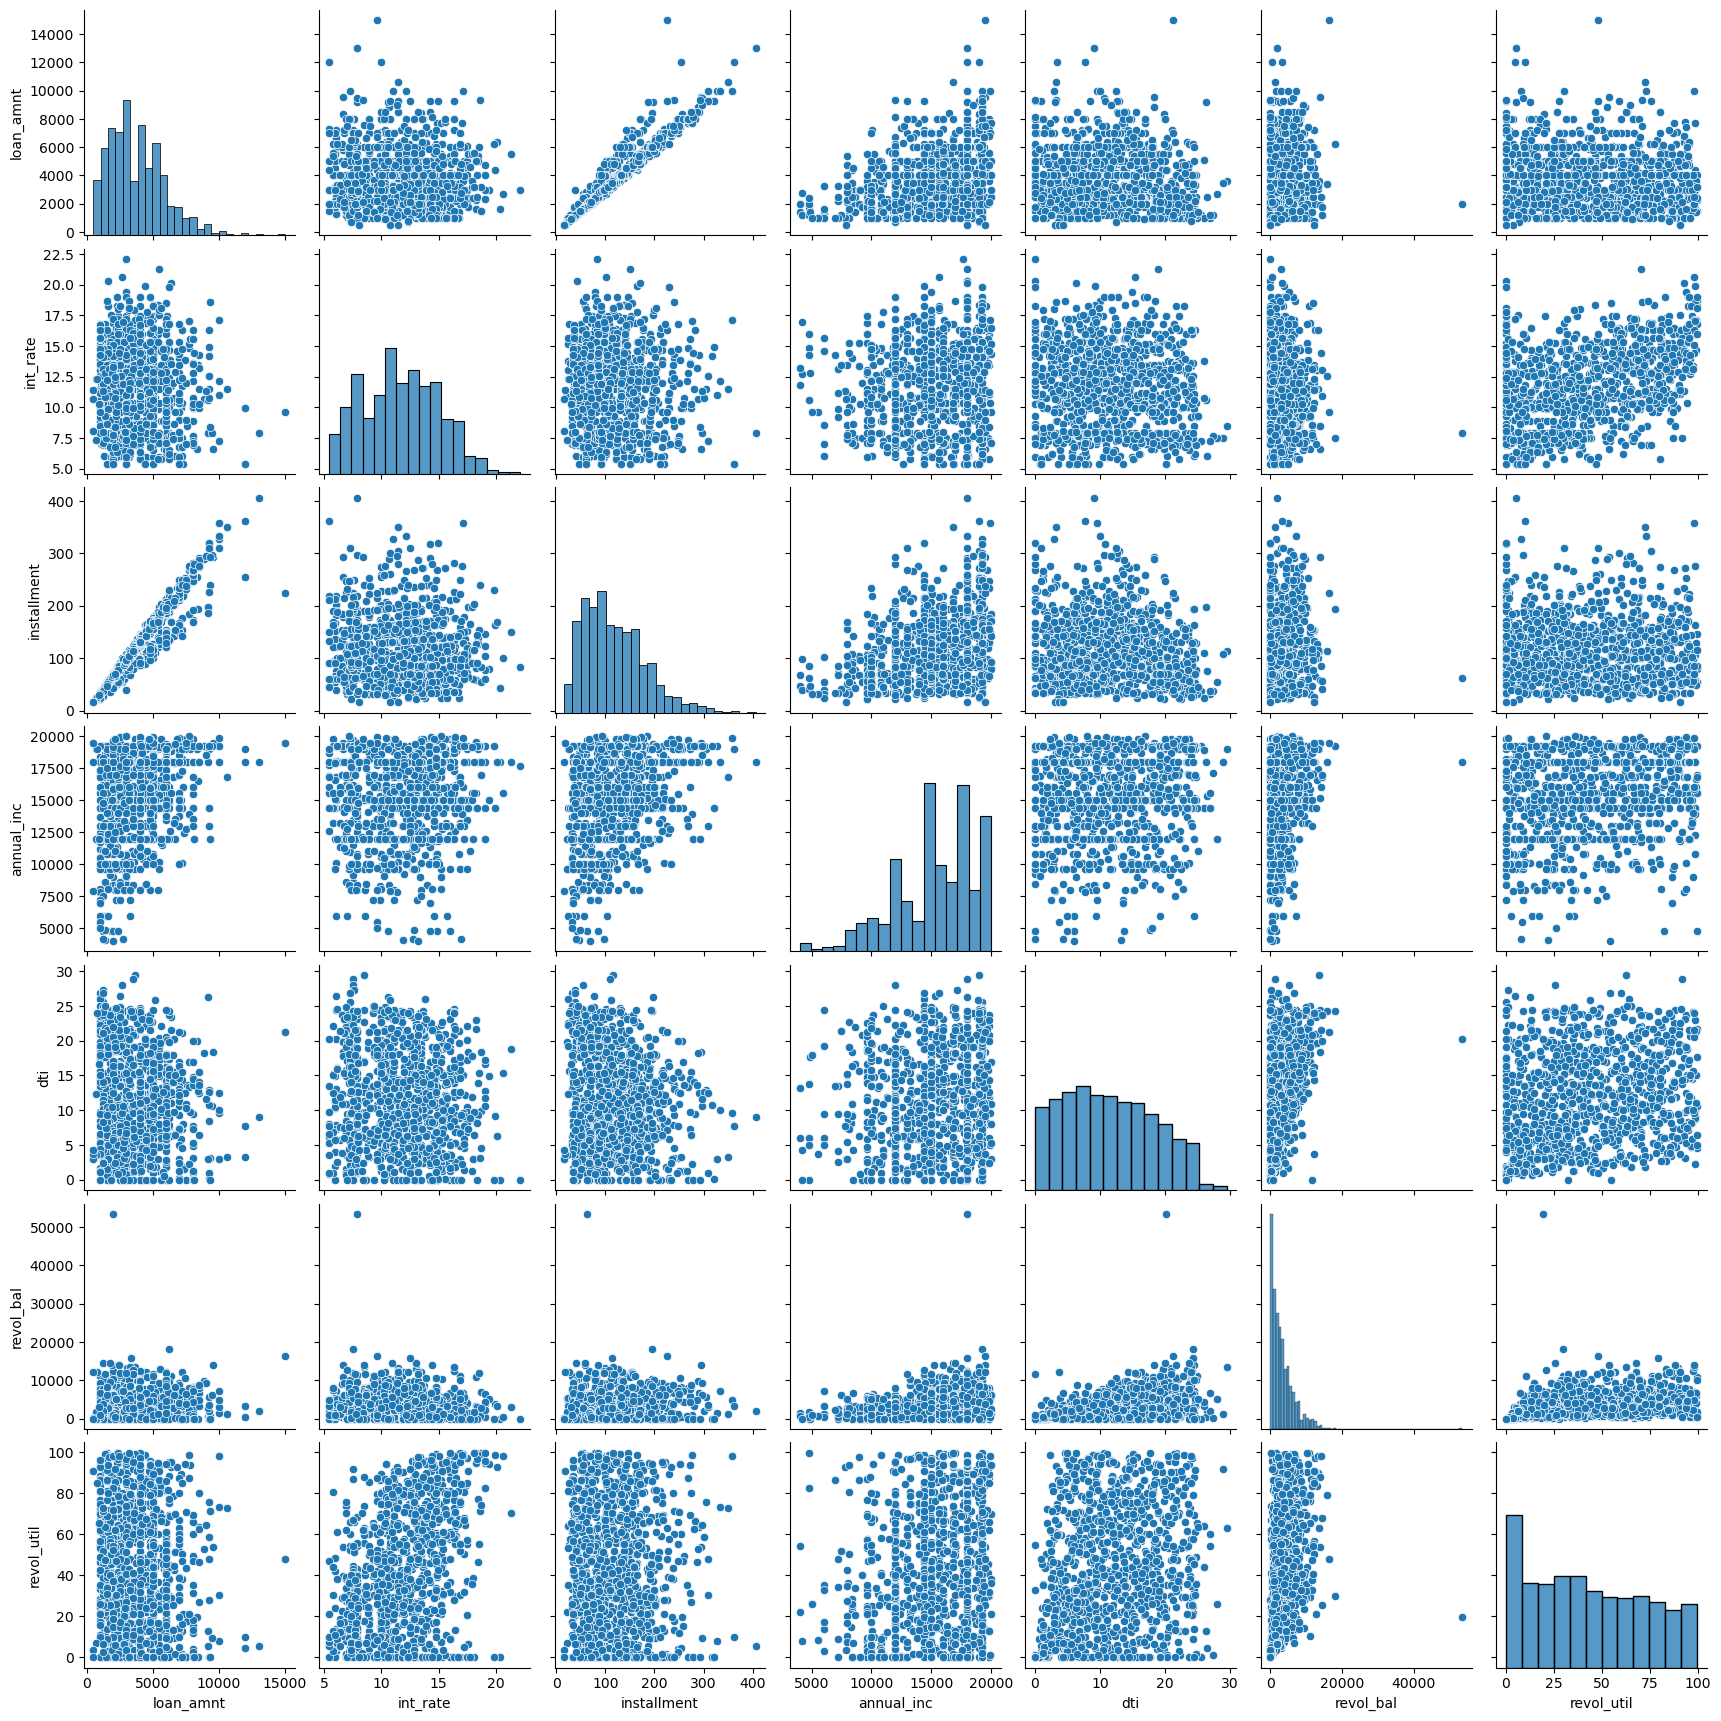

In [16]:
sns.pairplot(df2[['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util']])
plt.show()

In [17]:
## Univariate Analysis

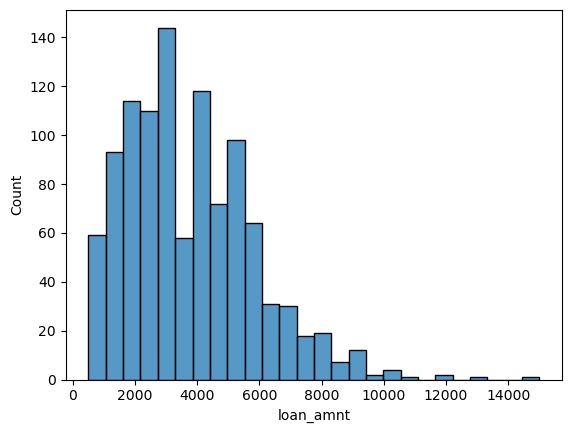

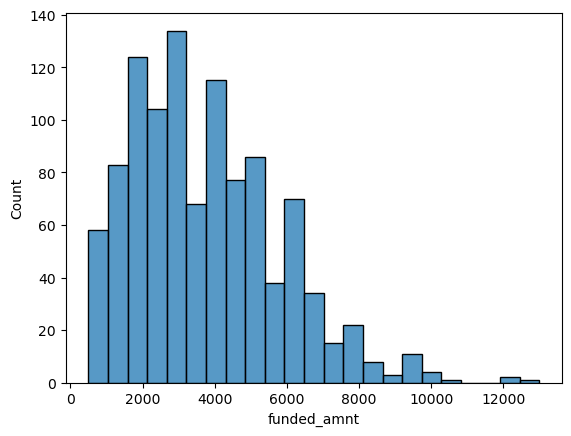

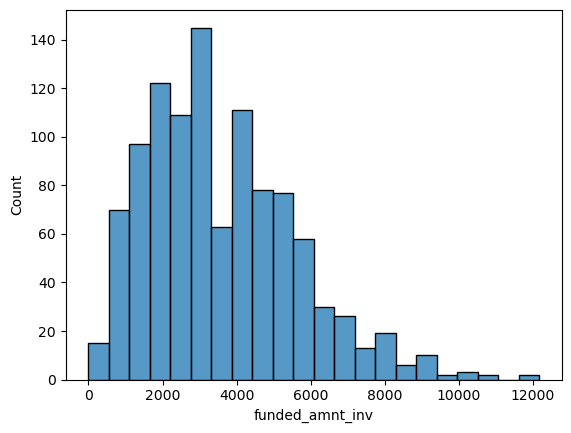

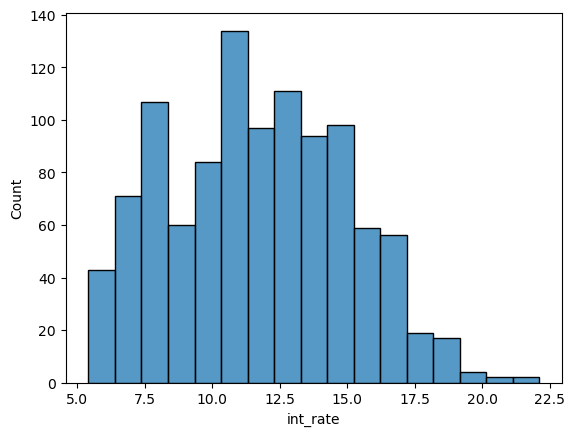

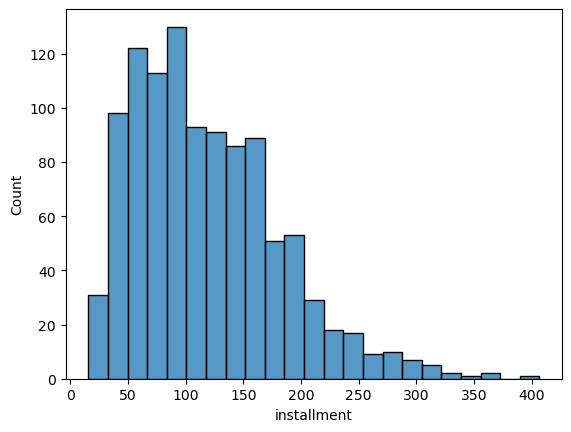

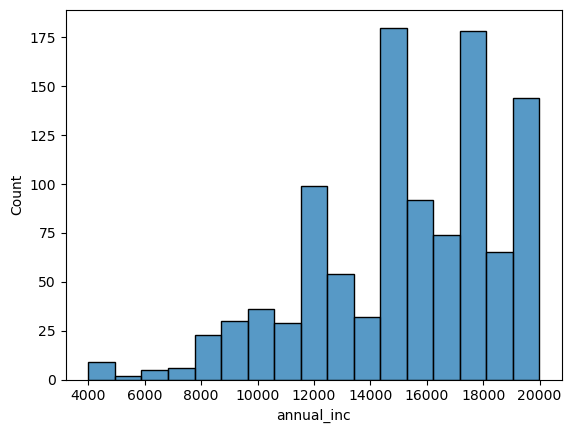

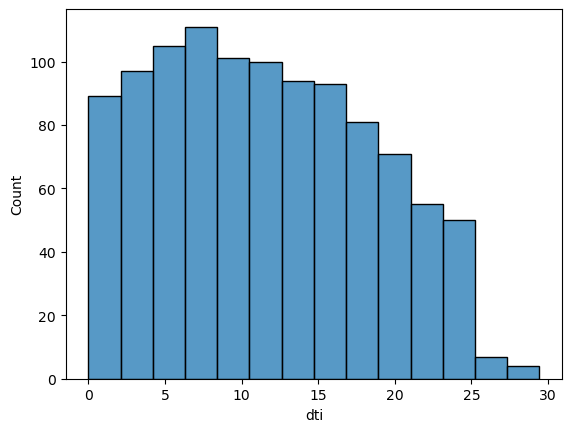

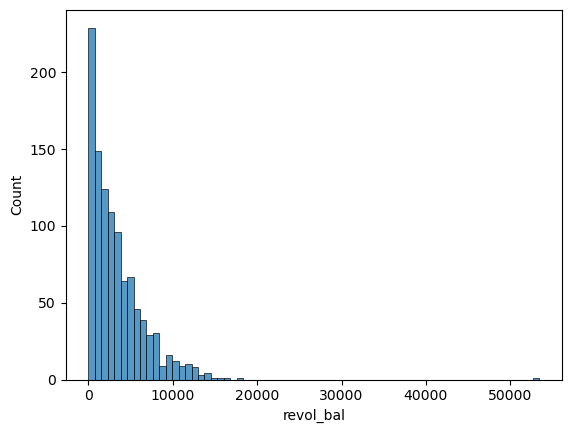

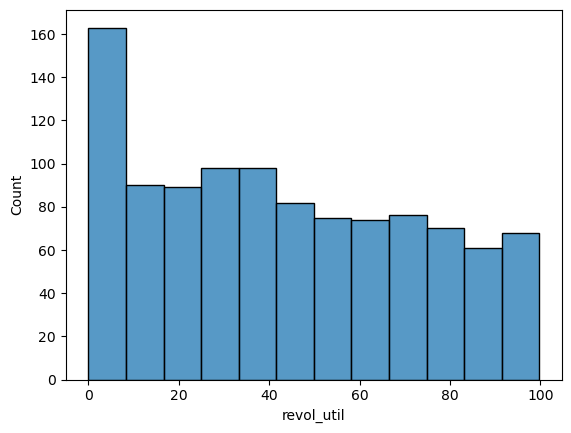

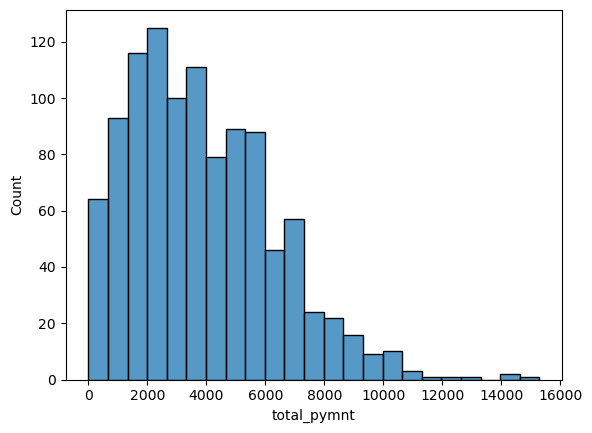

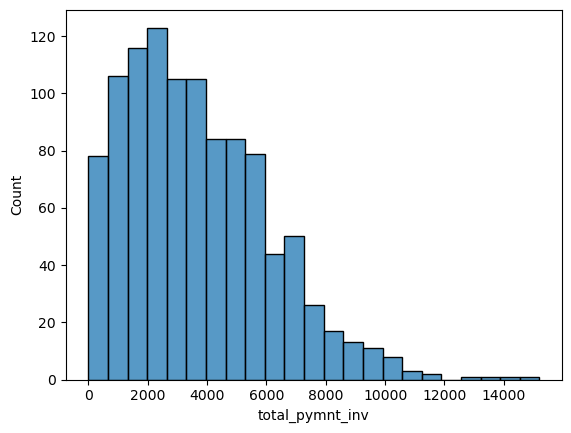

In [18]:
# For all numerical columns plot a histogram
for col in numerical_vars:
    sns.histplot(x=df2[col])
    plt.show()

In [19]:
# Removing outliers from loan amount
df2 = df2[df['loan_amnt'] < 31000]

In [20]:
df2['loan_amnt'].quantile(1)

15000.0

In [21]:
df2['loan_amnt'].describe()

count     1058.000000
mean      3777.055766
std       2044.274871
min        500.000000
25%       2150.000000
50%       3475.000000
75%       5000.000000
max      15000.000000
Name: loan_amnt, dtype: float64

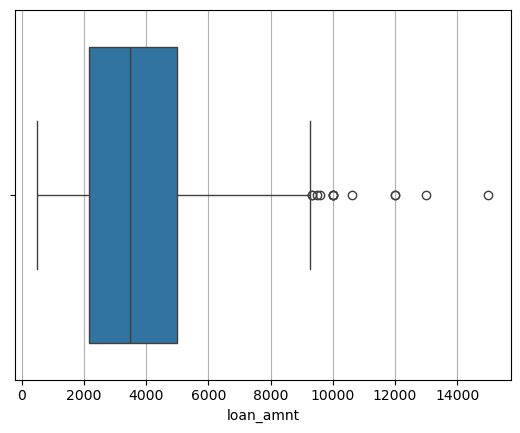

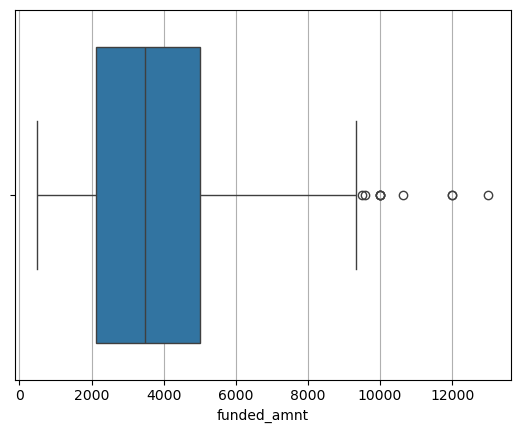

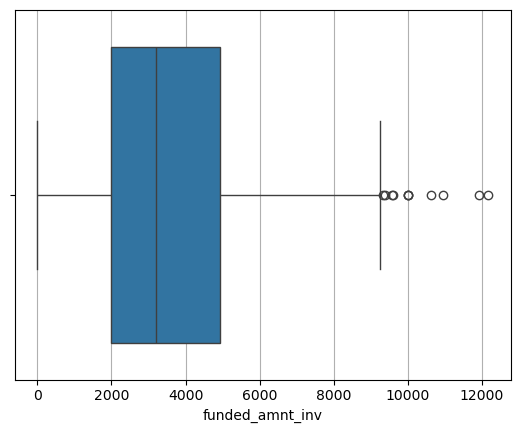

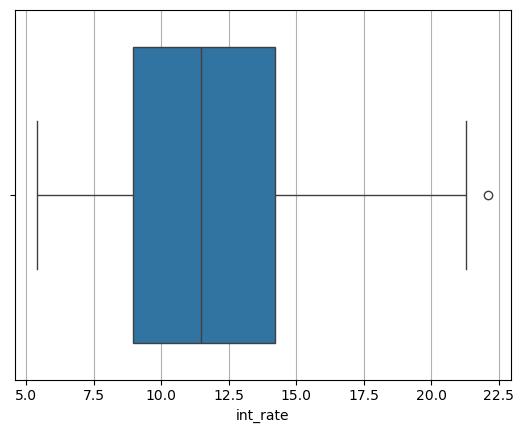

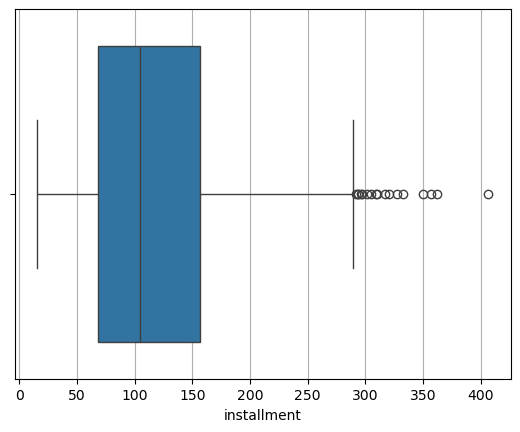

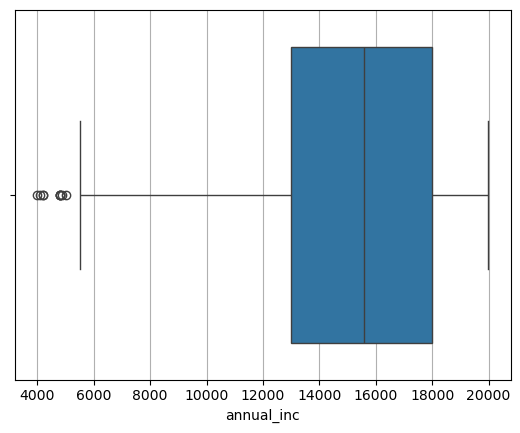

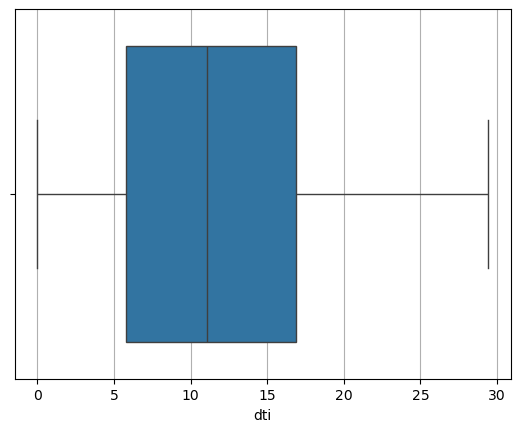

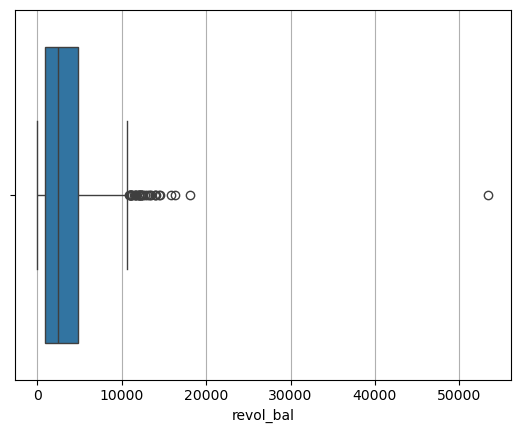

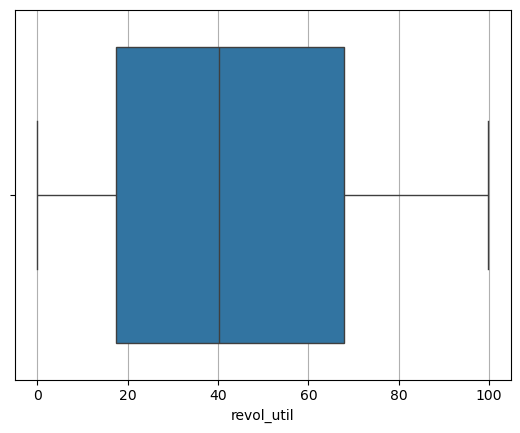

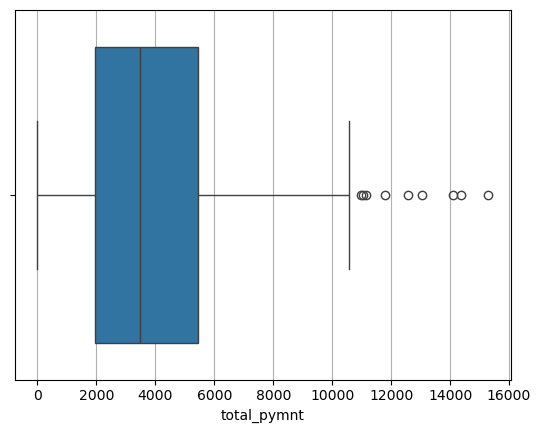

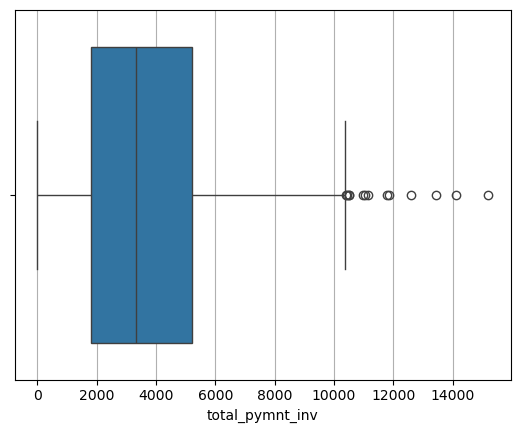

In [22]:
# For all numerical columns plot a boxplot
for col in numerical_vars:
    plt.grid(True,axis='x')
    sns.boxplot(x=df2[col])
    plt.show()

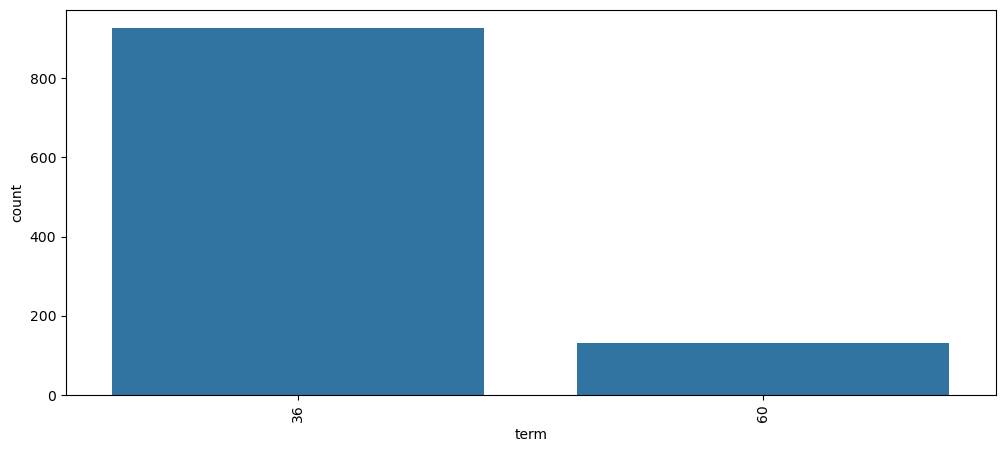

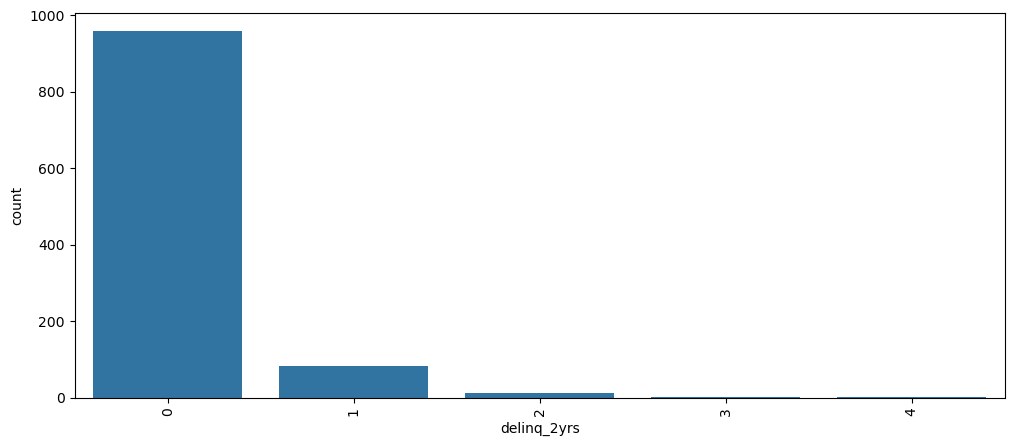

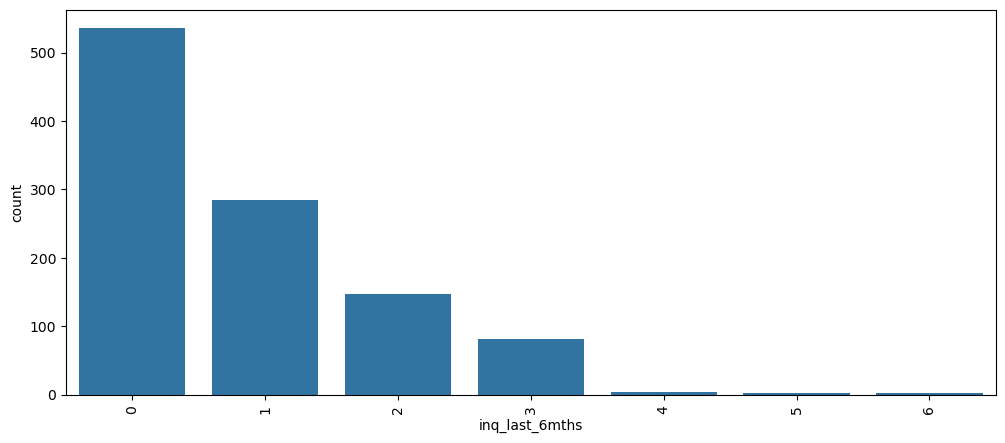

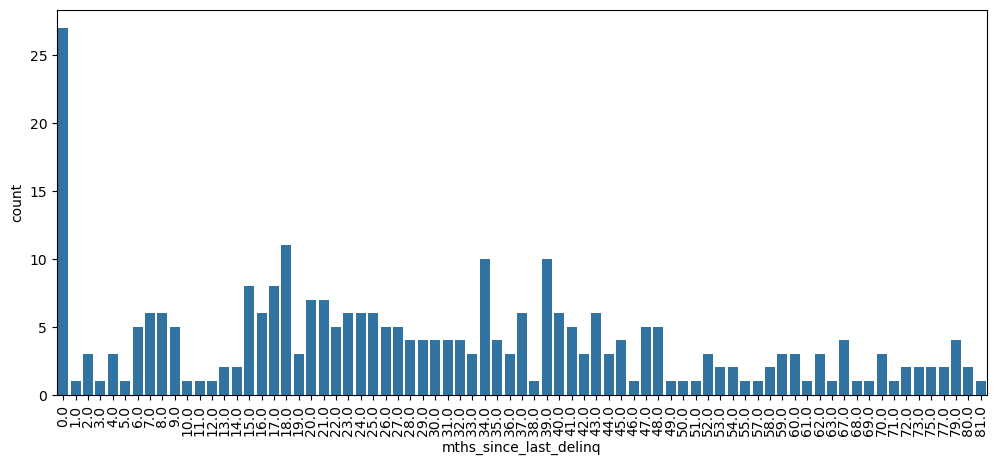

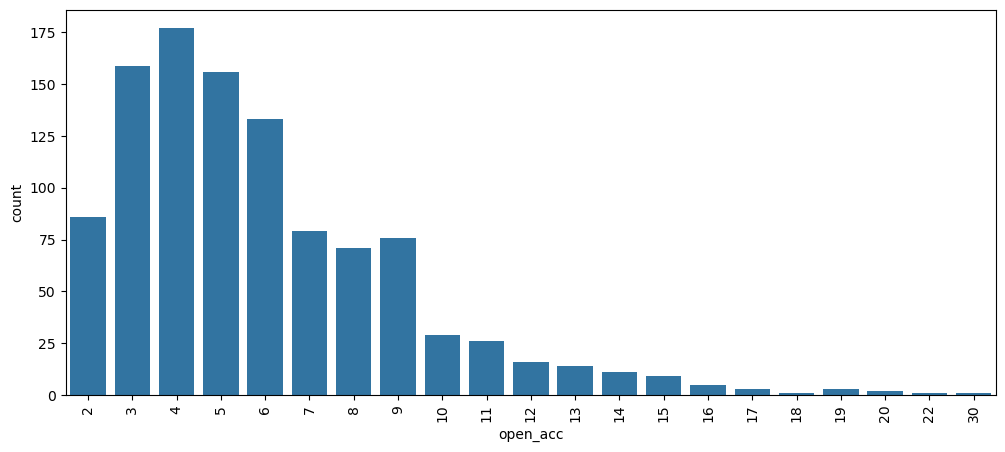

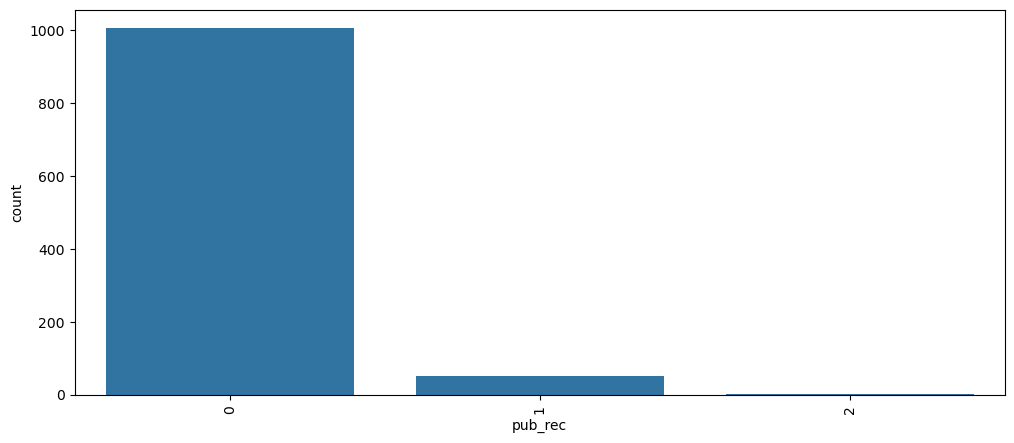

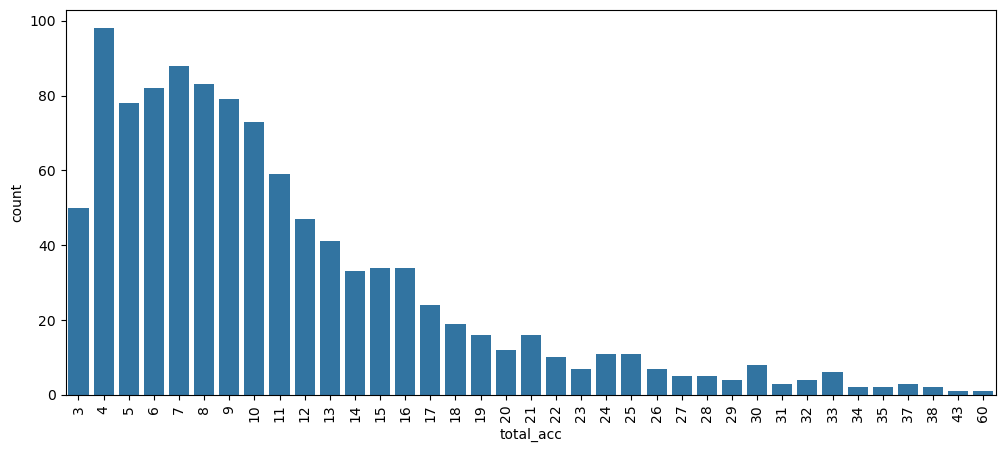

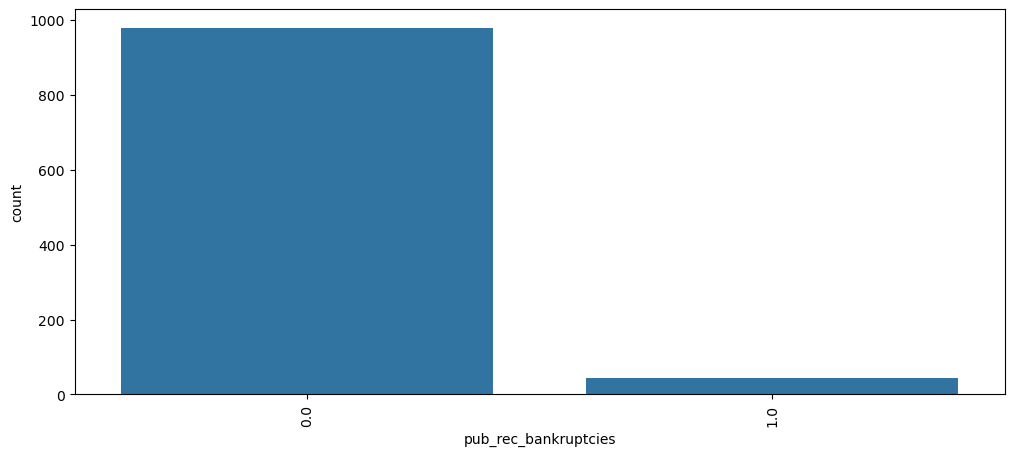

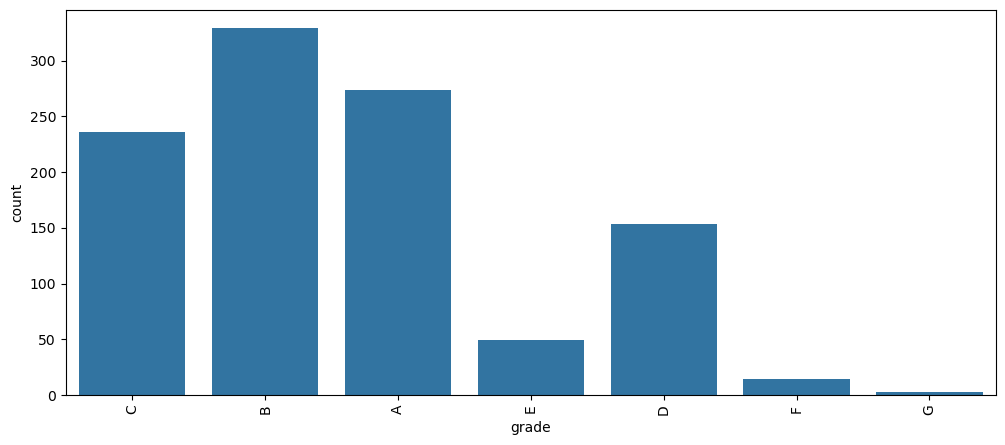

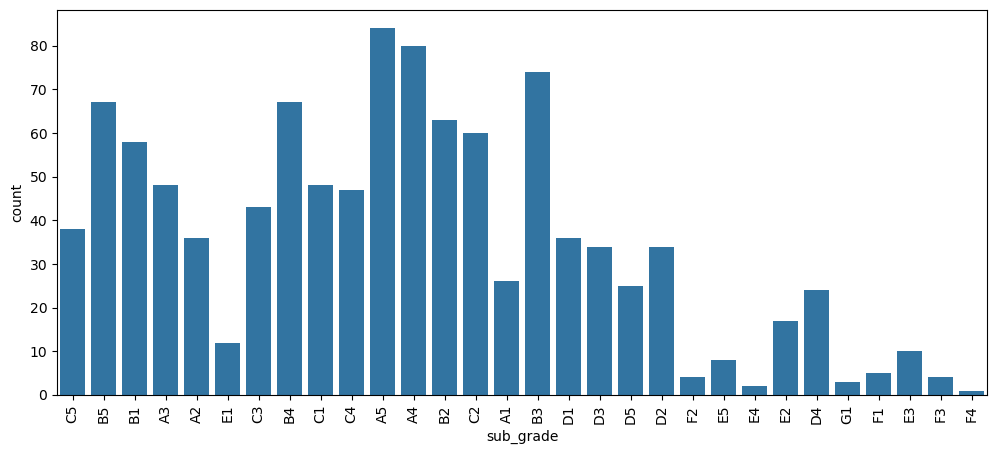

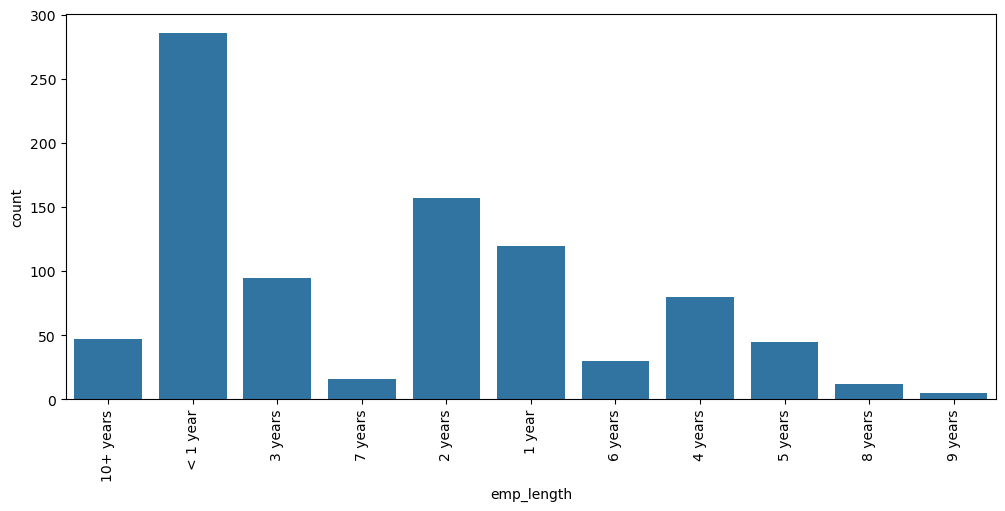

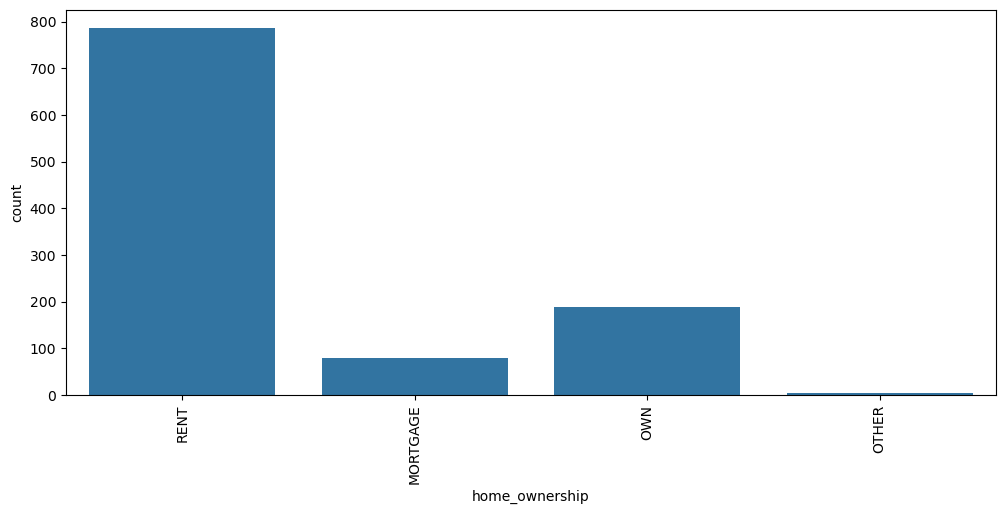

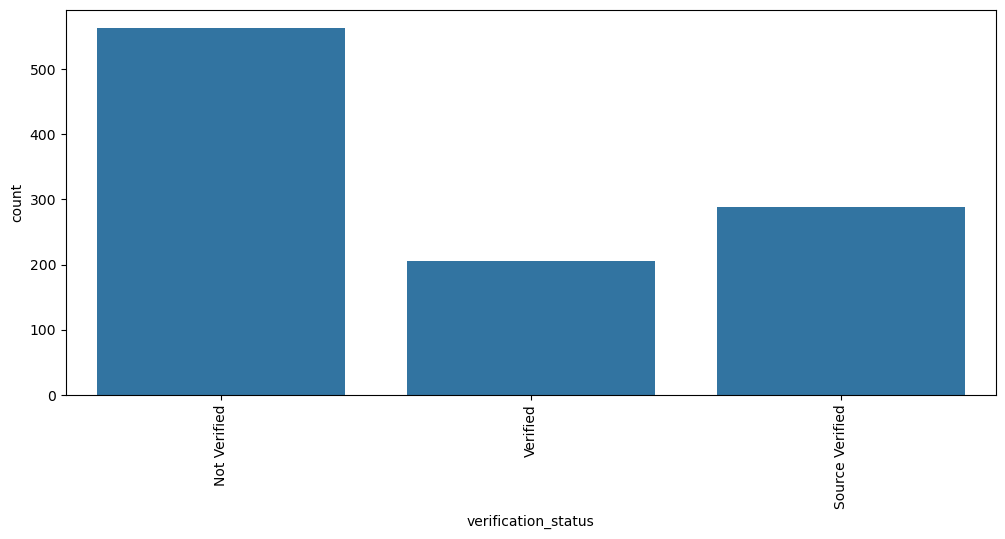

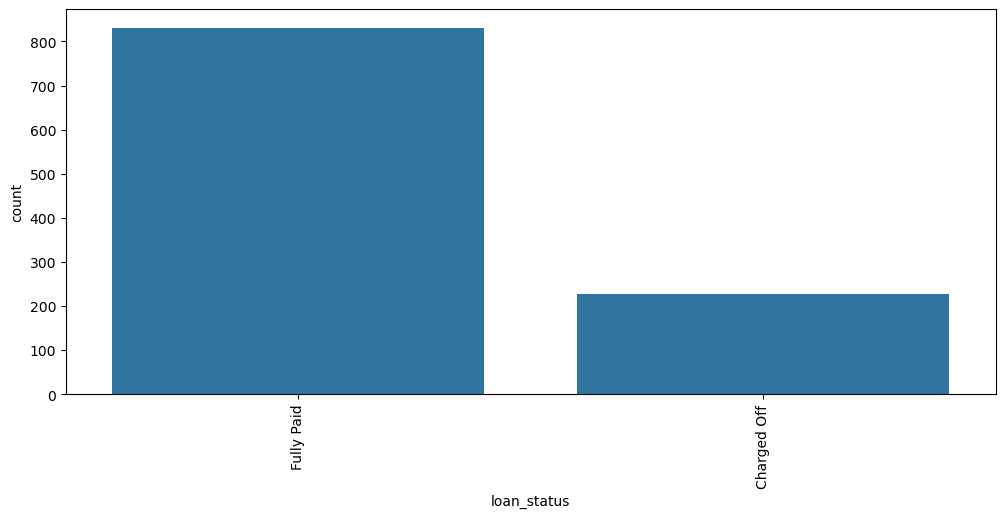

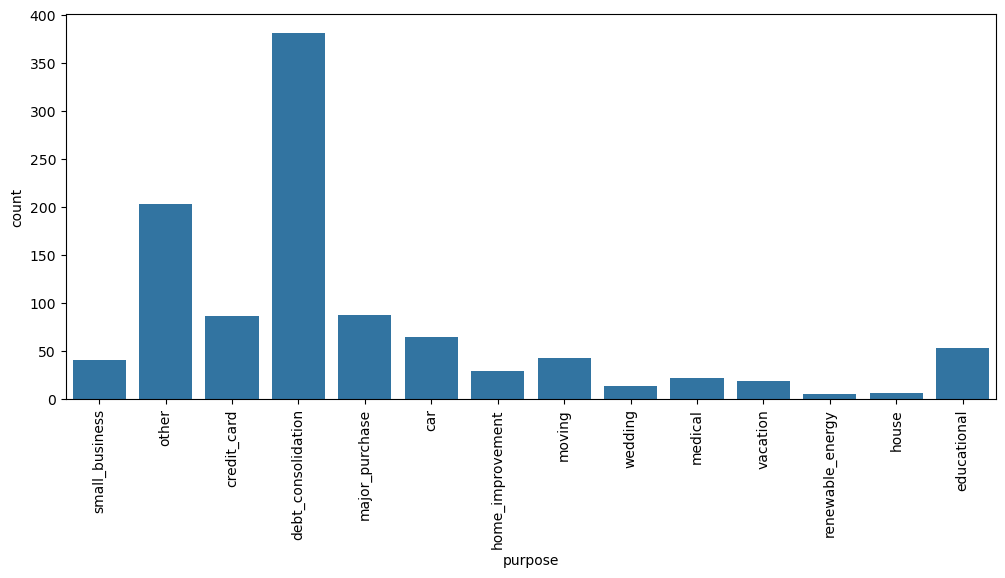

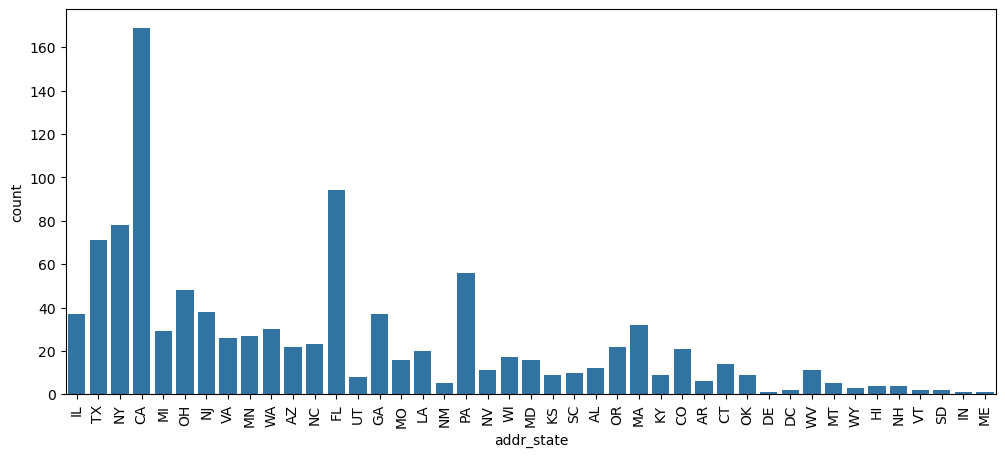

In [23]:
# For all categorical columns plot a countplot
for col in categorical_vars:
    #plt.figure(figsize=(12,5))
    sns.countplot(x=df2[col])
    plt.xticks(rotation=90)
    plt.show()

In [24]:
df2['loan_amnt'].describe()

count     1058.000000
mean      3777.055766
std       2044.274871
min        500.000000
25%       2150.000000
50%       3475.000000
75%       5000.000000
max      15000.000000
Name: loan_amnt, dtype: float64

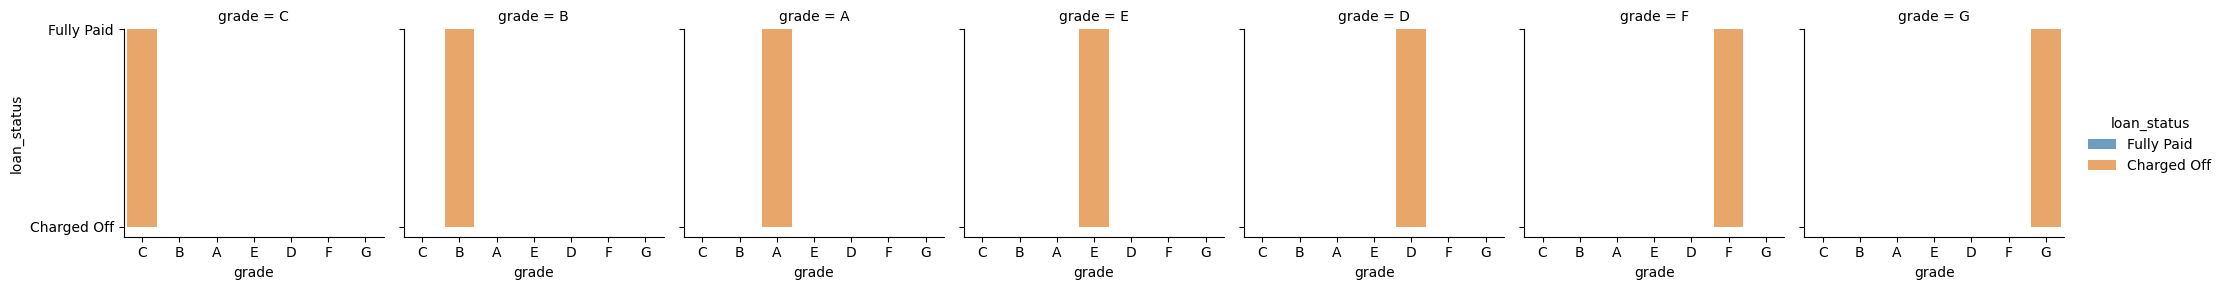

In [60]:
g = sns.FacetGrid(df2, col="grade", hue="loan_status")
g.map(sns.barplot, "grade", "loan_status", alpha=.7)
g.add_legend()
plt.show()

<Axes: xlabel='grade', ylabel='count'>

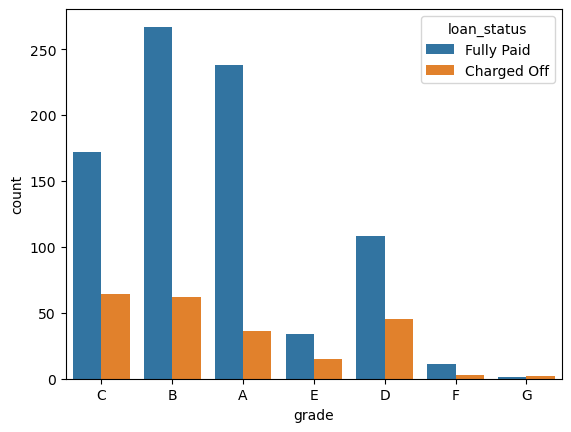

In [62]:
sns.countplot(x='grade', data=df2, hue='loan_status')